In [1]:
# Etapa 1 – Importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.clustering import *

In [2]:
# Etapa 2 – Carregar e inspecionar o dataset

# Carregar dataset
df = pd.read_csv('../data/raw/Country-data.csv')

# Verificar dimensões e primeiras linhas
print("Formato:", df.shape)
df.head()

Formato: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Informações gerais
df.info()

# Estatísticas descritivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


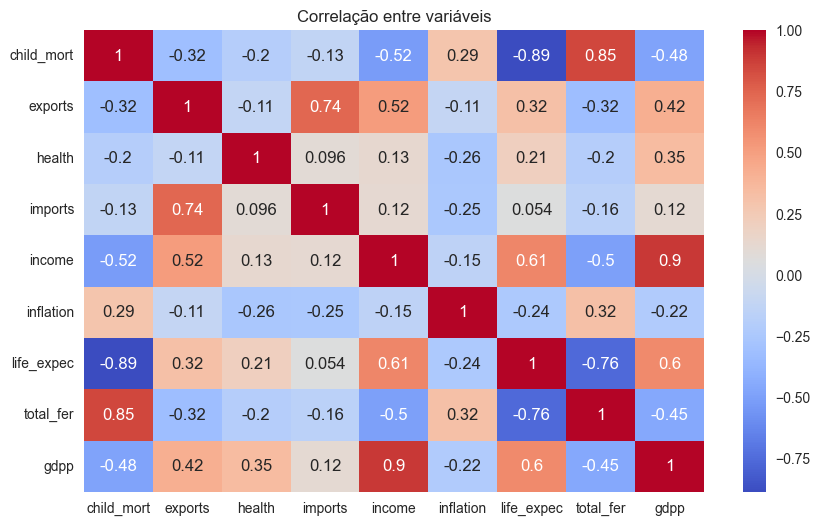

In [4]:
# Matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

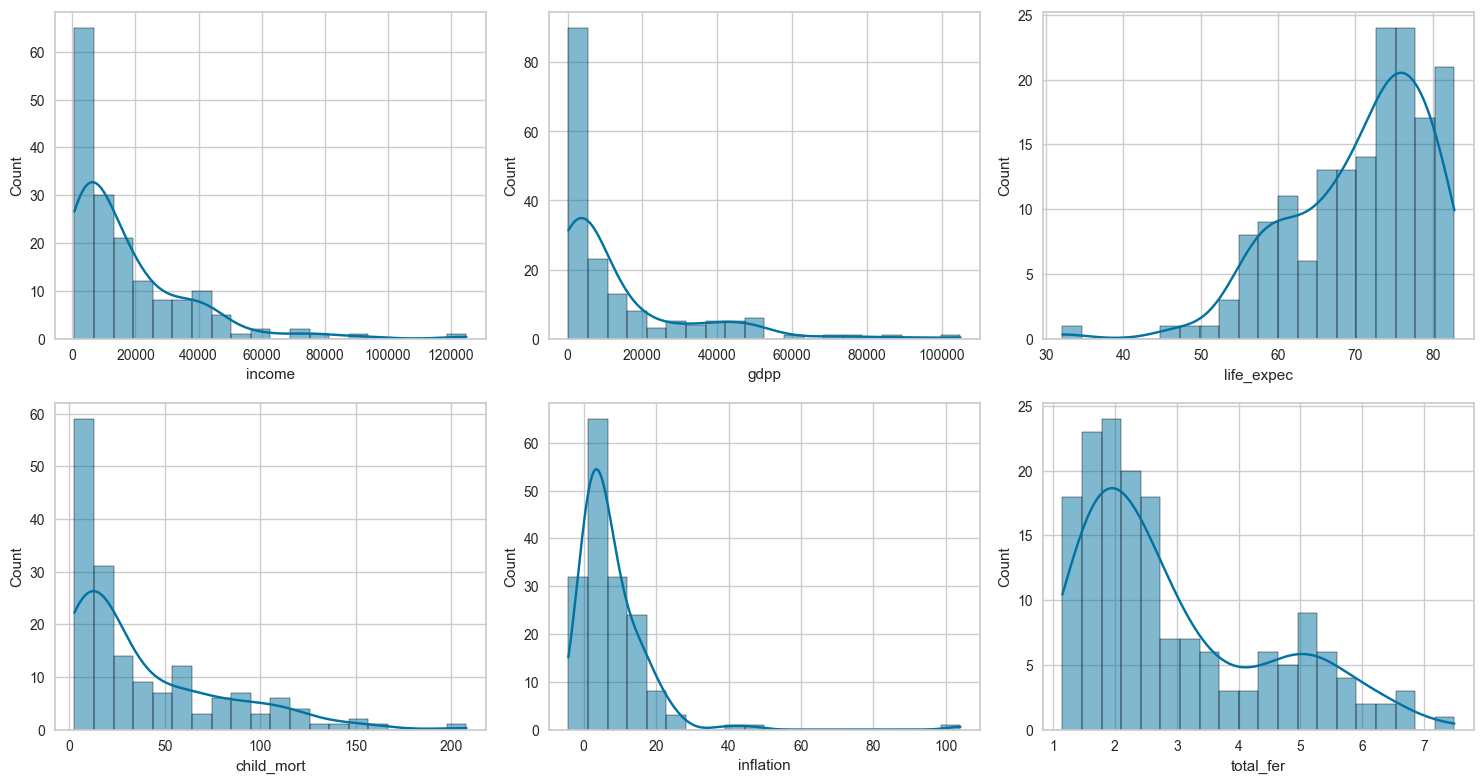

In [5]:
# Distribuição de algumas variáveis
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.histplot(df['income'], bins=20, ax=axes[0,0], kde=True)
sns.histplot(df['gdpp'], bins=20, ax=axes[0,1], kde=True)
sns.histplot(df['life_expec'], bins=20, ax=axes[0,2], kde=True)
sns.histplot(df['child_mort'], bins=20, ax=axes[1,0], kde=True)
sns.histplot(df['inflation'], bins=20, ax=axes[1,1], kde=True)
sns.histplot(df['total_fer'], bins=20, ax=axes[1,2], kde=True)
plt.tight_layout()
plt.show()

# Insights esperados:
# - Países com alta renda tendem a ter maior expectativa de vida e menor mortalidade infantil.
# - Distribuições provavelmente assimétricas → reforça a importância da normalização.

In [6]:
# Etapa 3 – Pré-Processamento dos Dados

# Remover coluna categórica (usada apenas para identificação) e salvar versão processada
from pathlib import Path

processed_dir = Path('../data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)

# remove a coluna se existir; caso contrário, mantém o dataset
data = df.drop(columns=['country'], errors='ignore')

processed_path = processed_dir / 'Country-data_processed.csv'
data.to_csv(processed_path, index=False)

# Recarrega do arquivo processado para garantir consistência no restante do notebook
data = pd.read_csv(processed_path)

# Confirmar
data.head()

# O PyCaret fará automaticamente:
# - Normalização (StandardScaler);
# - Conversão de tipos;
# - Tratamento de outliers básicos (se solicitado).

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
# Etapa 4 – Configuração do Ambiente PyCaret
setup_clustering = setup(
    data = data,
    normalize = True,          # Normaliza os dados automaticamente
    transformation = False,    # Pode deixar False a princípio
    ignore_features = [],      # Nenhuma ignorada além da 'country'
    session_id = 42,           # Reprodutibilidade
    verbose = False
)

setup_clustering

In [9]:
# Etapa 5 – Criação dos modelos

# K-Means
kmeans = create_model('kmeans')

# Hierarchical Clustering
hier = create_model('hclust')

# DBSCAN
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2880,54.3779,0.9983,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2481,48.2626,1.0801,0,0,0


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


In [10]:
# Etapa 6 – Avaliação e comparação de modelos

compare_models()

# O PyCaret exibirá:
# - Silhouette Score;
# - Calinski-Harabasz Index;
# - Davies-Bouldin Index.
# Quanto maior o Silhouette e o Calinski-Harabasz, melhor; quanto menor o Davies-Bouldin, melhor.

NameError: name 'compare_models' is not defined

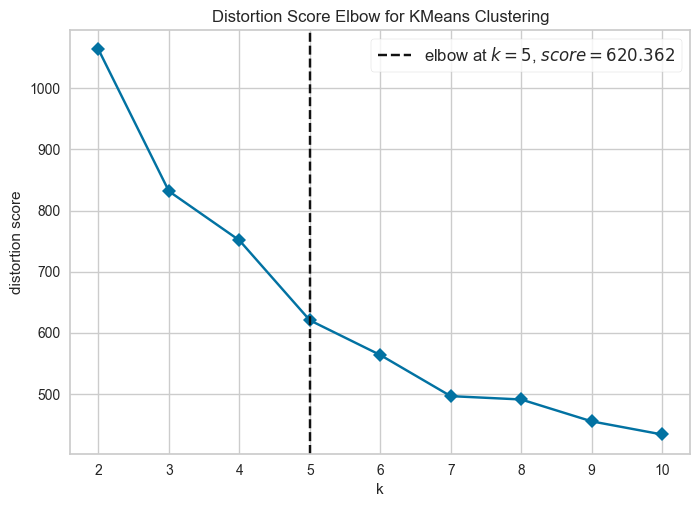

ValueError: Plot Not Available. Please see docstring for list of available Plots.

In [11]:
# Etapa 7 – Visualização dos clusters

# Exemplo com o modelo K-Means
plot_model(kmeans, plot='cluster')   # Scatter 2D
plot_model(kmeans, plot='elbow')     # Ajuda a definir o número ideal de clusters
plot_model(hier, plot='dendrogram')  # Dendrograma (para o modelo hierárquico)

In [12]:
# Etapa 8 – Interpretação dos clusters

# Atribuir rótulos de cluster aos dados
clustered = assign_model(kmeans)
clustered.head()

# Estatísticas médias por cluster
summary = clustered.groupby('Cluster').mean()
summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
Cluster 0,22.456978,40.273129,6.251047,47.362392,12321.744186,7.720883,72.566284,2.340349,6461.767442
Cluster 1,5.000000,58.738892,8.807777,51.491665,45672.222222,2.671250,80.127777,1.752778,42494.444444
Cluster 2,94.313629,28.677502,6.329091,42.872726,3503.250000,9.895568,59.022728,5.047728,1753.909091
Cluster 3,130.000000,25.299999,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [ ]:
# Juntar novamente com os nomes dos países
final = pd.concat([df['country'], clustered['Cluster']], axis=1)
final.head(167)

,country,Cluster
0,Afghanistan,Cluster 2
1,Albania,Cluster 0
2,Algeria,Cluster 0
3,Angola,Cluster 2
4,Antigua and Barbuda,Cluster 0
...,...,...
162,Vanuatu,Cluster 0
163,Venezuela,Cluster 0
164,Vietnam,Cluster 0
165,Yemen,Cluster 2
